In [2]:
from time import time
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Merge Sort Algorithm
### By Starting Five: Alexander, Carlo, Kirtesh, Namir, Pei

Your task is to write a function that takes a list of sortable types as input and outputs a sorted list using merge sort algorithm. There are many ways to implement merge sort, but you should focus on using recursive functions.

Use your function to sort different lengths of input lists, estimating the time complexity for best, worst and average cases.

In [3]:
def mergesort(alist):
    """
    This is an implementation of the merge sort function.
    :param alist: An unsorted list that is being passed through the function
    :return: Returns nothing, as the original list is being modified. No return needed and you can print out the same
            list you entered into the function!
    """
    if len(alist) > 1:  # checks if the list is already at a length of one -- meaning the recursion has reached the
        # end, and will therefor end the recursion going down.
        left = alist[:len(alist) // 2]  # splits the list into a left and right half, using the len // 2 function so
        # that a "rounded down" integer is being used to slice the list
        right = alist[len(alist) // 2:]

        # recursion
        mergesort(left)  # initialize recursion on the left side of the list
        mergesort(right)  # initialize recursion on the right side of the list

        # merge

        left_index = 0  # initial left list index, will change over time!
        right_index = 0  # initial right list index, will change over time!
        sorted_index = 0  # merged list index, will change over time!

        while left_index < len(left) and right_index < len(right):  # this is where the merging begins, indexes are
            # being checked if they are in the list indexes, if they are not, this means that one list was longer as
            # the other one and then this while gets skipped during the last iteration
            if left[left_index] < right[right_index]:  # checks whether the first number in the left list is smaller
                # than the first number in the right list.
                alist[sorted_index] = left[left_index]  # original list is being updated with the new smallest value
                # from leftmost position of the left list
                left_index += 1  # left index is increased and sorted_index is also increased following the completion
                # of this if-else block. The while loop will continue as long as both left_index < len(left) and
                # right_index < len(right) are true!
            else:
                alist[sorted_index] = right[right_index]
                right_index += 1
            sorted_index += 1

        while left_index < len(left):  # this and the following while block will only execute when either the left or
            # right list is longer than the other. In this case, the last number in that list will automatically be
            # added to the end of the original list as it will be the largest number from this list set.
            alist[sorted_index] = left[left_index]
            left_index += 1
            sorted_index += 1

        while right_index < len(right):
            alist[sorted_index] = right[right_index]
            right_index += 1
            sorted_index += 1

In [4]:
list_ = [6, 5, 12, 10, 9, 1]
mergesort(list_)
print(list_)

[1, 5, 6, 9, 10, 12]


In [5]:
sns.set_context("paper")
sns.set_style("ticks")

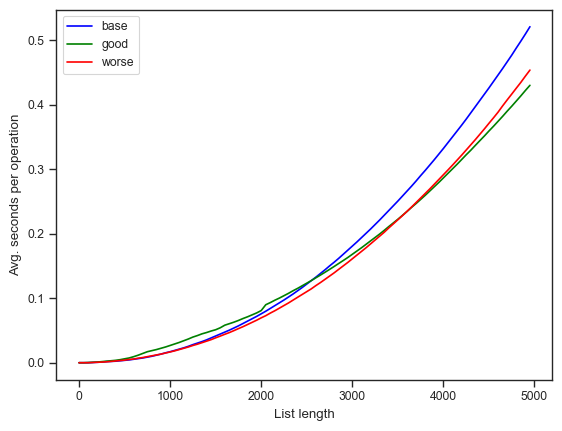

3


In [7]:
# we want to creat list with different length
#lengths_to_run = [5, 50, 500, 10000]
#lengths_to_run = [random.randint(1, 100) for i in range(1, random.randint(6, 100))]
lengths_to_run = [i for i in range(1, 5000, 50)]

sorted_lists_results = []
inversely_sorted_lists_results = []
random_lists_results = []
time_to_run = 0
total = []
#max_iterations = int(input("Enter the amount of iterations you want to do: "))
max_iterations = 3


def run_sort(runs_per_length, list_, scenario):
    if scenario == "good":
        pass
    elif scenario == "base":
        random.shuffle(list_)
    elif scenario == "worse":
        list_ = list_[::-1]

    iterations = 0

    while iterations < max_iterations:
        iterations += 1

        time_begin = time()
        mergesort(list_)
        time_end = time()
        total_time = time_end - time_begin
        total.append(total_time)

    total_time = sum(total) / max_iterations
    return total_time


def results(scenario):
    global total
    total = []
    for lengths in lengths_to_run:
        list_to_be_sorted = list(range(1, lengths))
        time_elapsed = run_sort(runs_per_length=5, list_=list_to_be_sorted, scenario=scenario)
        if scenario == "good":
            sorted_lists_results.append(time_elapsed)
        elif scenario == "base":
            random_lists_results.append(time_elapsed)
        elif scenario == "worse":
            inversely_sorted_lists_results.append(time_elapsed)


results("good")
results("base")
results("worse")

plt.plot(lengths_to_run, random_lists_results, color="blue", label="base")
plt.plot(lengths_to_run, sorted_lists_results, color="green", label="good")
plt.plot(lengths_to_run, inversely_sorted_lists_results, color="red", label="worse")
plt.xlabel("List length")
plt.ylabel("Avg. seconds per operation")

plt.legend()
plt.show()
print(max_iterations)